<a href="https://colab.research.google.com/github/EmmaM17/Bridge-Report/blob/ai-classifier/clothing_Classifier3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Prepare Environment**

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import cv2
import pathlib

In [52]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
#print(model.summary())

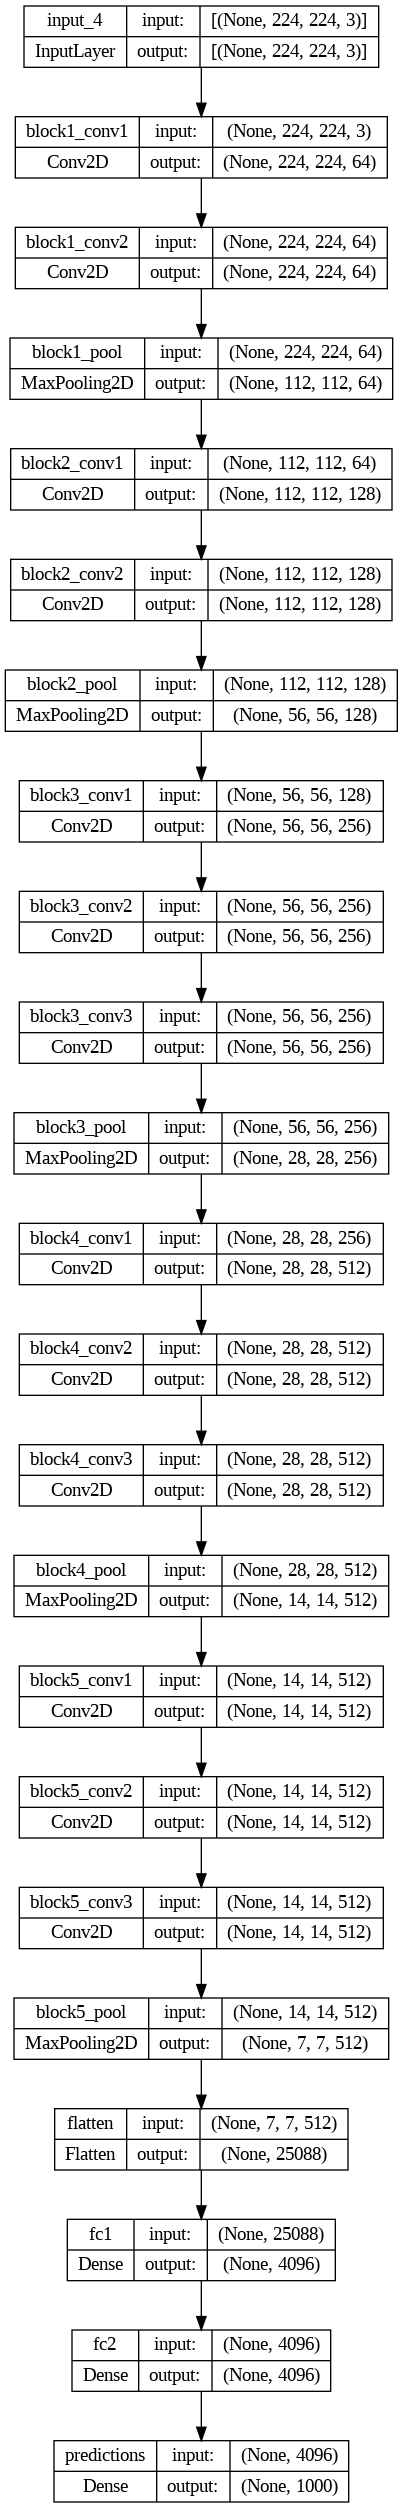

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes= True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


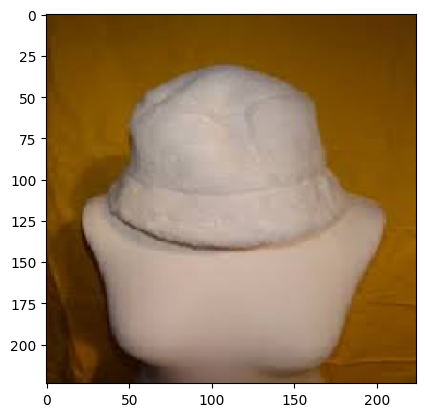

In [54]:
#Get Training images
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import load_img
imagePath= '/content/drive/MyDrive/Final Project/Clothing_Images_Sorted/Hats/download (8).jpg'
image = load_img(imagePath, target_size=(224,224))  #has to be 224 for vgg

plt.imshow(image)

In [55]:
#convert image to numpy array
from tensorflow.keras.preprocessing.image import img_to_array
image=img_to_array(image)

In [56]:
#reshape data for model
image= image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))

In [57]:
from tensorflow.keras.applications.vgg16 import preprocess_input
image= preprocess_input(image)
yhat= model.predict(image)

print (yhat.shape)

1/1 [==============================] - 1s 766ms/step
(1, 1000)


In [58]:
np.set_printoptions(formatter= {'float': '{: 0.3f}'.format})
#print(yhat)

In [59]:
from tensorflow.keras.applications.vgg16 import decode_predictions

#convert the probabilities to class labels
label1= decode_predictions(yhat)
#retrieve the msot likely result (highest probability)
label = label1[0][0]
#print classification
print ('%s (%.2f%%)' % (label[1], label[2] *100))

lampshade (9.54%)


In [60]:
item_description=[]
def labelItem(label):
  if 'brassiere' in label[1]:
    item_description.append('cropTop')
  elif 'sandal' in label[1]:
    item_description.append('flats')
  elif 'clog' in label[1]:
    item_description.append('flats')
  elif 'loafer' in label[1]:
    item_description.append('flats')
  elif 'swimming_trunks' in label[1]:
    item_description.append('shorts')
  elif 'running_shoe' in label[1]:
    item_description.append('trainers')
  elif 'cowboy_boot' in label[1]:
    item_description.append('boots')
  elif 'jersey' in label[1]:
    item_description.append('top')
  elif 'jean' in label[1]:
    item_description.append('jeans')
  elif 'pajama' in label[1]:
    item_description.append('jumpsuit')
  elif 'suit' in label[1]:
    item_description.append('suit')
  elif 'gown' in label[1]:
    item_description.append('dress')
  elif 'miniskirt' in label[1]:
    item_description.append('miniSkirt')
  elif 'sarong' in label[1]:
    item_description.append('maxiSkirt')
  elif 'stole' in label[1]:
    item_description.append('scarf')
  elif 'cowboy_hat' in label[1]:
    item_description.append('hat')
  elif 'trench_coat' in label[1]:
    item_description.append('jacket')
  elif 'sunglasses' in label[1]:
    item_description.append('sunglasses')
  elif 'knot' in label[1]:
    item_description.append('scarf')
  else:
    item_description.append('BLANK')

labelItem(label)
print(item_description)

['BLANK']


In [61]:
for i in range (len(label1[0])):
  if 'BLANK' in item_description:
    item_description.clear()
    label= label1[0][i]
    print(label)
    labelItem(label)
    print(item_description)


('n03637318', 'lampshade', 0.095404826)
['BLANK']
('n04380533', 'table_lamp', 0.081499234)
['BLANK']
('n03903868', 'pedestal', 0.07524738)
['BLANK']
('n04522168', 'vase', 0.06775834)
['BLANK']
('n04131690', 'saltshaker', 0.045217156)
['BLANK']


# **What colour is the item??**

9958 unique RGB values out of 50246 pixels
5 unique RGB values out of 50246 pixels


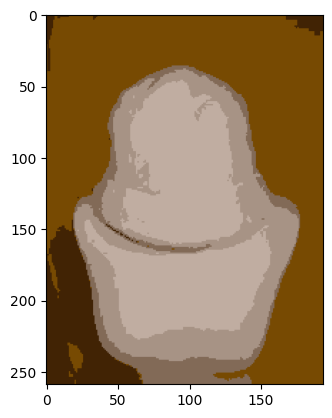

In [62]:
from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB
from numpy import float32, uint8, unique
from matplotlib.pyplot import show, imshow

# Read image
img =imread(imagePath) #('/content/drive/MyDrive/Final Project/Clothing_Images_Sorted/Dress/000534.jpg')

# Convert it from BGR to RGB
img_RGB = cvtColor(img, COLOR_BGR2RGB)

# Reshape image to an Mx3 array
img_data = img_RGB.reshape(-1, 3)

# Find the number of unique RGB values
print(len(unique(img_data, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Specify the algorithm's termination criteria
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the pixel values
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)

# Apply the RGB values of the cluster centers to all pixel labels
colours = centers[labels].reshape(-1, 3)

# Find the number of unique RGB values
print(len(unique(colours, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Reshape array to the original image shape
img_colours = colours.reshape(img_RGB.shape)

# Display the quantized image
imshow(img_colours.astype(uint8))
show()

In [63]:
# Print the cluster centers
print('Cluster centers:')
for i in centers:
    print(i)

Cluster centers:
[ 130.457  106.102  87.724]
[ 167.239  147.316  133.872]
[ 192.497  173.542  161.191]
[ 65.839  35.402  4.471]
[ 119.385  74.384  2.764]


In [64]:
#define the colour categories by their rgb value
def colour_categories(colour):
    colour =(round(colour[0]),round(colour[1]),round(colour[2]))

    colourList = {
        (255, 0, 0): "red",
        (175, 0, 0): "burgundy",
        (225, 125, 175): "pink",
        (250, 225, 250): "pastelPink",
        (225, 75, 255): "purple",
        (225, 200, 255): "lilac",
        (100, 0, 100): "plum",
        (0, 0, 255): "blue",
        (0, 0, 125): "navy",
        (0, 255, 255): "lightBlue",
        (0, 255, 200): "aqua",
        (0, 255, 0): "green",
        (0, 150, 0): "darkGreen",
        (200, 255, 200): "pastelGreen",
        (255, 255, 0): "yellow",
        (255, 255, 200): "pastelYellow",
        (200, 200, 0): "gold",
        (255, 200, 0): "orange",
        (125, 100, 0): "brown",
        (255, 250, 225): "cream",
        (255, 255, 255): "white",
        (125, 125, 125): "grey",
        (0, 0, 0): "black"
    }

    minDistance = float("inf") #used for upperbound comparison
    closestMatch = None

    for colourRGB, colourName in colourList.items():
        distance = sum((c1 - c2) ** 2 for c1, c2 in zip(colour, colourRGB))
        if distance < minDistance:
            minDistance = distance
            closestMatch = colourName

    return closestMatch
print(centers[1])
for clr in centers:
  #colour= (clr[0],clr[1],clr[2])
  item_description.append(colour_categories(clr))

#print(item_description)
#item_description.append((colour_categories(centers[1])))

print (item_description)

#Now find the closest match

[ 167.239  147.316  133.872]
['BLANK', 'grey', 'grey', 'pink', 'black', 'brown']
